In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from google.colab import drive
#drive.mount('/content/drive')

df = pd.read_csv("dataset_mood_smartphone.csv")

In [9]:
# Create columns for variables that have a value
for var in df["variable"].unique():
    df['%s'%var] = np.where(df['variable'] == var, df['value'], np.NaN)

# Split the date-time in seperate columns, transform to a datetime format
df[['date', 'time']] = df['time'].str.split(' ', 1, expand=True)
df['time'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%Y-%m-%d %H:%M:%S.%f')

In [14]:
df.head()

,Unnamed: 0,id,time,variable,value,mood,circumplex.arousal,circumplex.valence,activity,screen,...,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,date
0,1,AS14.01,2014-02-26 13:00:00,mood,6.0,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-02-26
1,2,AS14.01,2014-02-26 15:00:00,mood,6.0,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-02-26
2,3,AS14.01,2014-02-26 18:00:00,mood,6.0,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-02-26
3,4,AS14.01,2014-02-26 21:00:00,mood,7.0,7.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-02-26
4,5,AS14.01,2014-02-27 09:00:00,mood,6.0,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-02-27


In [11]:
# Pick one sample user
df1 = df[df['id'] == 'AS14.01']
df_avg = pd.DataFrame()

# Average over the day
take_mean = set(("mood", "activity", "circumplex.arousal", "circumplex.valence"))

# Total time everyday
take_sum = set(("screen", "appCat.builtin","appCat.communication","appCat.entertainment", 
                "appCat.finance", "appCat.game", "appCat.office", "appCat.other", "appCat.social",  
                "appCat.travel", "appCat.unknown", "appCat.utilities", "appCat.weather"))

# Amount of calls or texts a day
take_count = set(("call", "sms"))

for var in df["variable"].unique():
    df2 = df1[df1[var].notna()]
    if var in take_mean:
        df_mean = df2.groupby('date').mean()
        df_avg[var] = df_mean[var]
    if var in take_sum:
        df_sum = df2.groupby('date').mean()
        df_avg[var] = df_sum[var]
    if var in take_count:
        df_count = df2.groupby('date').count()
        df_avg[var] = df_count[var]


df_avg

,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather
date,,,,,,,,,,,,,,,,,,,
2014-02-26,6.250000,-0.250000,0.750000,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-27,6.333333,0.000000,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-21,6.200000,0.200000,0.200000,0.134050,153.665872,6.0,NaN,14.269173,55.095526,53.024000,6.193000,NaN,57.40200,29.968875,75.141667,70.418846,NaN,23.029000,NaN
2014-03-22,6.400000,0.600000,0.500000,0.236880,47.613651,3.0,1.0,7.781160,51.697062,46.662000,7.025333,NaN,NaN,14.020429,36.636000,37.305000,NaN,39.207000,NaN
2014-03-23,6.800000,0.200000,0.800000,0.142741,67.067644,NaN,NaN,12.134396,53.442031,31.448667,10.850750,NaN,NaN,12.137167,50.046611,NaN,NaN,30.086000,30.386
2014-03-24,6.000000,0.800000,0.000000,0.078961,76.772199,10.0,NaN,4.982506,47.541687,122.121375,5.684333,NaN,3.01000,11.093000,74.968047,83.961000,NaN,89.366000,NaN
2014-03-25,6.750000,0.500000,0.500000,0.098374,169.097283,NaN,1.0,10.026874,69.437507,34.103000,10.763500,NaN,NaN,29.803167,68.552536,NaN,29.402875,22.289300,NaN
2014-03-26,6.600000,-0.200000,0.600000,0.101308,94.389661,NaN,NaN,8.460123,47.061534,130.068429,8.721833,NaN,NaN,16.249667,124.109703,NaN,NaN,33.365000,NaN
2014-03-27,7.000000,0.200000,0.800000,0.159511,129.201111,2.0,1.0,7.982643,43.353200,71.037667,14.073000,NaN,15.20425,9.755333,71.952385,23.657000,NaN,16.275364,NaN


In [12]:
# change NaN to 0
df_avg.fillna(0)

,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather
date,,,,,,,,,,,,,,,,,,,
2014-02-26,6.250000,-0.250000,0.750000,0.000000,0.000000,1.0,2.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
2014-02-27,6.333333,0.000000,0.333333,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
2014-03-21,6.200000,0.200000,0.200000,0.134050,153.665872,6.0,0.0,14.269173,55.095526,53.024000,6.193000,0.0000,57.40200,29.968875,75.141667,70.418846,0.000000,23.029000,0.000
2014-03-22,6.400000,0.600000,0.500000,0.236880,47.613651,3.0,1.0,7.781160,51.697062,46.662000,7.025333,0.0000,0.00000,14.020429,36.636000,37.305000,0.000000,39.207000,0.000
2014-03-23,6.800000,0.200000,0.800000,0.142741,67.067644,0.0,0.0,12.134396,53.442031,31.448667,10.850750,0.0000,0.00000,12.137167,50.046611,0.000000,0.000000,30.086000,30.386
2014-03-24,6.000000,0.800000,0.000000,0.078961,76.772199,10.0,0.0,4.982506,47.541687,122.121375,5.684333,0.0000,3.01000,11.093000,74.968047,83.961000,0.000000,89.366000,0.000
2014-03-25,6.750000,0.500000,0.500000,0.098374,169.097283,0.0,1.0,10.026874,69.437507,34.103000,10.763500,0.0000,0.00000,29.803167,68.552536,0.000000,29.402875,22.289300,0.000
2014-03-26,6.600000,-0.200000,0.600000,0.101308,94.389661,0.0,0.0,8.460123,47.061534,130.068429,8.721833,0.0000,0.00000,16.249667,124.109703,0.000000,0.000000,33.365000,0.000
2014-03-27,7.000000,0.200000,0.800000,0.159511,129.201111,2.0,1.0,7.982643,43.353200,71.037667,14.073000,0.0000,15.20425,9.755333,71.952385,23.657000,0.000000,16.275364,0.000


In [16]:
df_avg.describe()

,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather
count,47.000000,47.000000,47.000000,45.000000,45.000000,32.000000,14.000000,45.000000,45.000000,45.000000,32.000000,7.000000,8.000000,45.000000,45.000000,25.000000,5.000000,43.000000,1.000
mean,7.062411,-0.243262,0.700709,0.092498,107.137383,3.156250,1.571429,16.535246,52.105969,84.905901,16.530688,71.419929,33.161656,17.083115,85.559060,39.670815,25.036275,25.681782,30.386
std,0.603997,0.495726,0.292849,0.044607,45.184718,2.411122,1.089410,25.823467,19.762512,47.777758,14.447732,55.534699,28.012792,16.101226,115.347605,34.073545,12.340948,19.569116,NaN
min,6.000000,-1.250000,0.000000,0.014021,47.613651,1.000000,1.000000,4.886735,24.078694,18.720000,4.347667,1.059000,3.010000,6.296400,9.907333,5.031000,3.148000,5.541500,30.386
25%,6.500000,-0.500000,0.550000,0.068203,79.787870,1.000000,1.000000,6.685561,41.338271,49.711684,6.861062,40.130000,16.631312,8.564455,44.425930,19.082000,29.290000,16.424015,30.386
50%,7.200000,-0.250000,0.750000,0.090112,94.389661,2.000000,1.000000,9.175747,48.539810,74.520167,10.969708,57.203000,25.646500,12.091333,61.475750,23.538650,29.402875,21.601895,30.386
75%,7.600000,0.200000,1.000000,0.116110,129.201111,4.000000,1.750000,14.269173,57.015620,122.121375,16.209446,97.382500,37.447500,21.293500,76.815314,59.632053,30.102000,27.632567,30.386
max,8.000000,0.800000,1.000000,0.236880,250.017213,10.000000,4.000000,163.002043,143.371370,216.053655,62.503667,166.652500,90.481000,105.668400,789.459000,143.631000,33.238500,115.471800,30.386


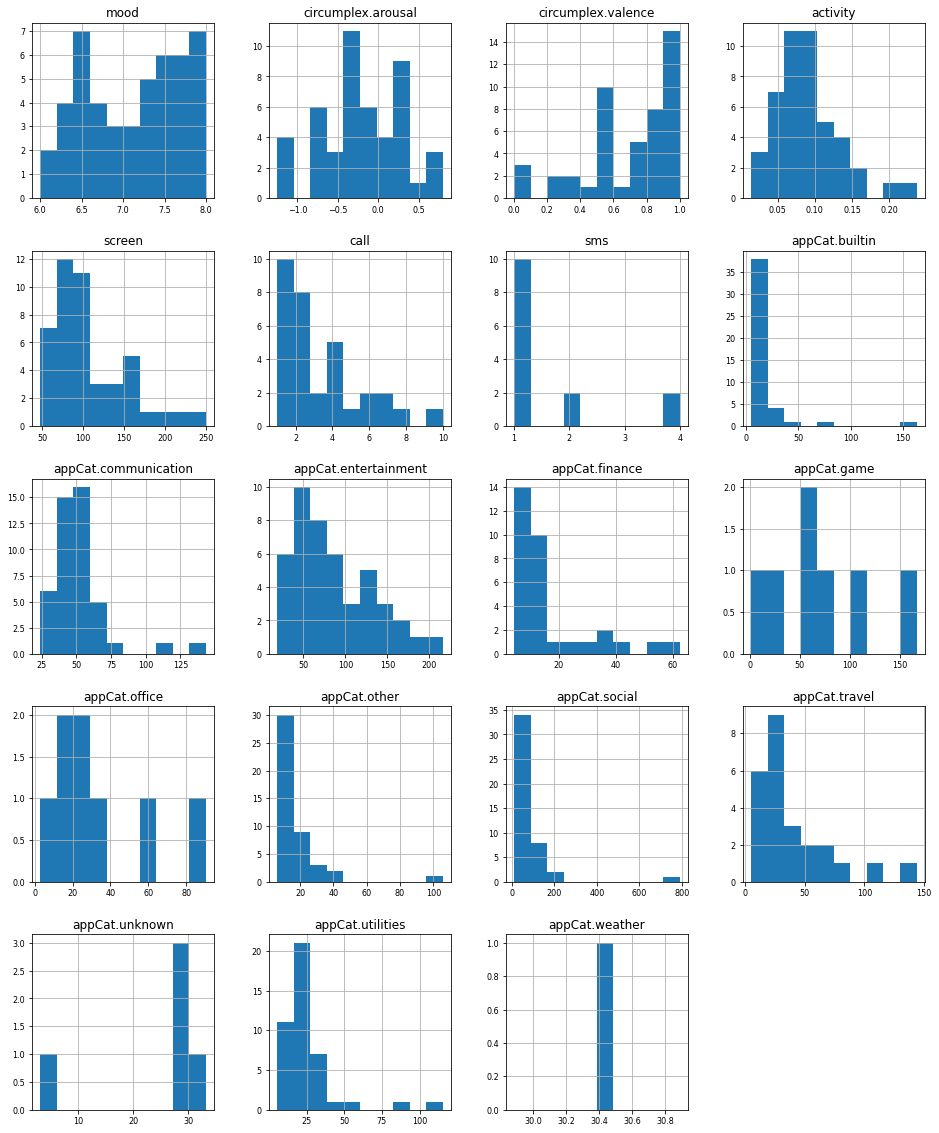

In [21]:
# distribution plots of all variables
df_avg.hist(figsize=(16, 20), bins=10, xlabelsize=8, ylabelsize=8);

In [39]:
# only valence correlated, however nothing done with outliers
df_avg_corr = df_avg.corr()['mood'][1:]
golden_features_list = df_avg_corr[abs(df_avg_corr) > 0.4].sort_values(ascending=False)
print("There is {} strongly correlated values with mood:\n{}".format(len(golden_features_list), golden_features_list))

There is 3 strongly correlated values with mood:
circumplex.valence    0.801723
appCat.finance        0.457505
appCat.game          -0.447407
Name: mood, dtype: float64


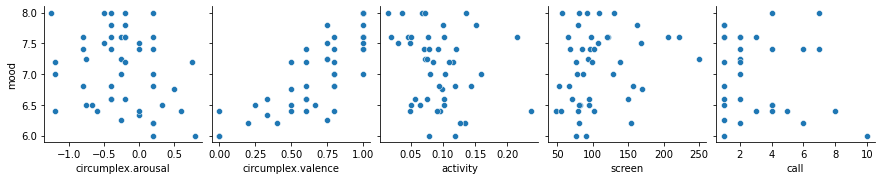

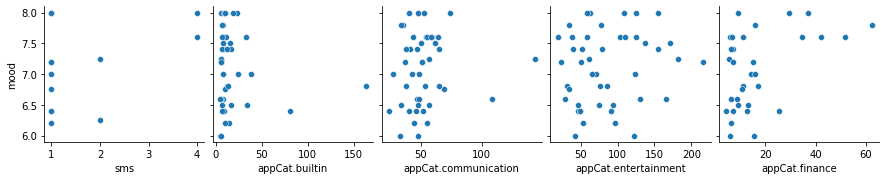

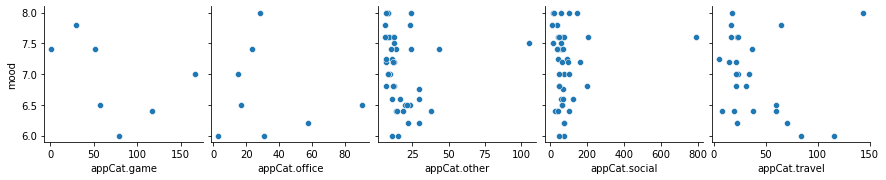

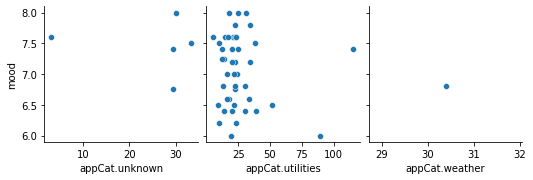

In [33]:
# scatterplots of all variables against mood
for i in range(1, len(df_avg.columns)+1, 5):
    sns.pairplot(data=df_avg,
                x_vars=df_avg.columns[i:i+5],
                y_vars=['mood'])

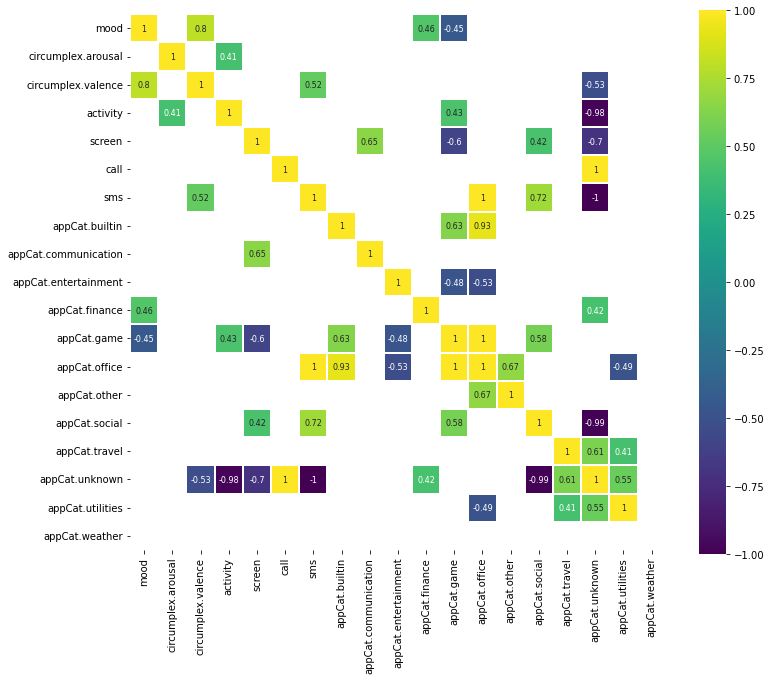

In [40]:
# call correlates 1 on 1 with  app unknown and sms 1 on 1 with app office
corr = df_avg.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.4) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [45]:
features_to_analyse = [x for x in df_avg.columns if x in golden_features_list]
features_to_analyse.append('mood')
features_to_analyse

['circumplex.valence', 'appCat.finance', 'appCat.game', 'mood']

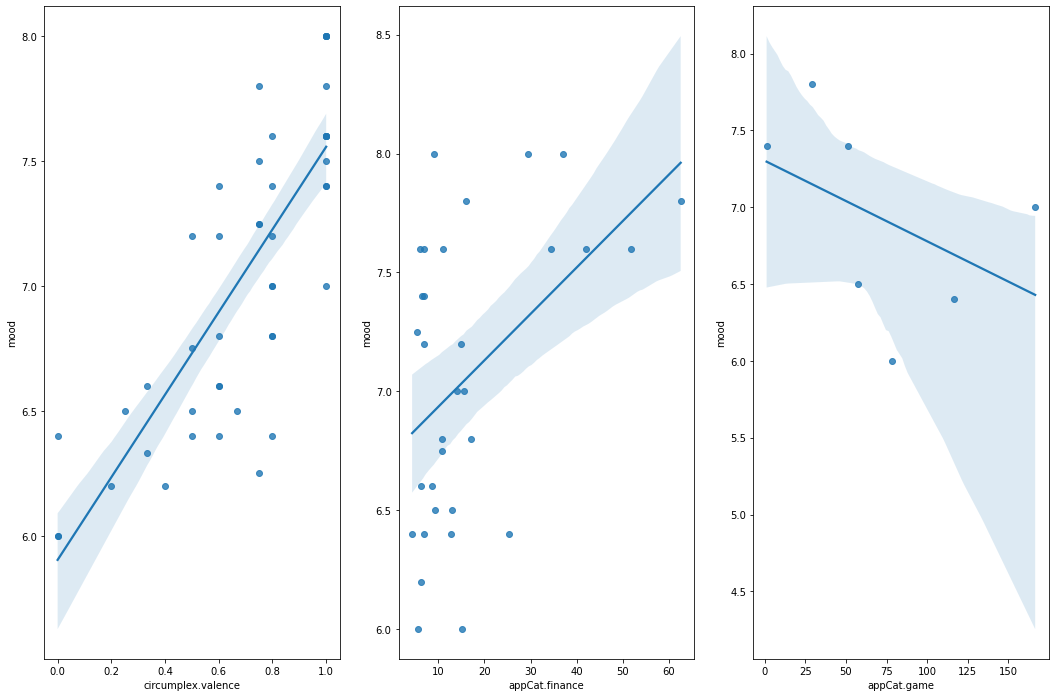

In [44]:
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='mood', data=df_avg[features_to_analyse], ax=ax)